In [1]:
import matplotlib.pyplot as plt
from itertools import combinations
from random import random,randint
import numpy as np
from functools import reduce
from scipy.optimize import minimize
from scipy.linalg import expm,sinm,cosm

import time
import math
from   matplotlib import cm
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, execute
from qiskit.quantum_info.analysis import average_data
from qiskit import *
from qiskit.quantum_info.operators import Operator
from qiskit.aqua.utils import tensorproduct
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from qiskit.providers.ibmq      import least_busy
from qiskit.tools.monitor       import job_monitor
from qiskit.visualization import plot_histogram
import picos as pic
import warnings
from docplex.mp.model import Model
from qiskit.optimization import QuadraticProgram
from qiskit.optimization.algorithms import CplexOptimizer
import scipy.linalg as la
from itertools import permutations, combinations


In [2]:
def num_1_pos(d):
    get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
    num_1 = get_indexes(1,d)
    return num_1,len(num_1)

def num_0_pos(d):
    get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
    num_0 = get_indexes(0,d)
    return num_0,len(num_0)

def column(matrix, i):
    return [row[i] for row in matrix]

#Construct initial state 
def init_s(n):
    x = pow(2,n)
    s = 1/np.sqrt(x) * np.ones(x)
    s = s.reshape(x, 1)
    return s

def bin2dec(string_num):
    return str(int(string_num, 2))

def row_binary(v):
    for i in range(len(v)):
        if v[i]%2 == 0:
            v[i] = 0
        else:
            v[i] = 1 
    return v

def converter(d):
    P = 0
    for i in range(len(d)):
        P+=d[i]*(2**(len(d)-i-1))
    return P
                 
#Define some pauli operators
PauliX = [[0,1],[1,0]]   
PauliZ = [[1,0],[0,-1]]
PauliI = np.eye(2)

#Define Cjk and B
def Cjk_generator(d):
    n = len(d)
    l = list(range(0,n))    
    for i in range(n):
        l[i] = PauliI
    s = num_1_pos(d)[0]
    for j in range(len(s)):
        l[s[j]] = PauliZ
    Cjk = l[0]
    for i in range(n-1):
        Cjk = np.kron(Cjk,l[i+1])
    return Cjk

def B_generator(n):
    l = list(range(0,n))
    b = list(range(0,n))
    
    for a in range(n):
        for i in range(n):
            l[i] = PauliI
        l[a]=PauliX
        temp = l[0]
        for i in range(n-1):
            temp = np.kron(temp,l[i+1])
        b[a] = temp
    B = sum(b[a] for a in range(n))
    return B

def basis(n):
    nums = np.array([a for a in range(2**(n))]) 
    bin_nums = (((nums.reshape(-1,1) & (2**np.arange(n)))) != 0).astype(int)
    a = bin_nums[:,::-1]
    return a


def matrix_binary(A):
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if A[i][j]%2 == 0:
                A[i][j] = 0
            else:
                A[i][j] = 1
    return A

def error(n,err):
    e = np.zeros(n)
    a = np.random.randint(n,size=err)
    for i in range(len(a)):
        e[a[i]] = 1 
    return e
    




In [3]:
G_oringin = np.array([[1,0,0,0,1,1,0],
              [0,1,0,0,1,0,1],
              [0,0,1,0,0,1,1],
              [0,0,0,1,1,1,1]])
G_oringinT = G_oringin.T

n = G_oringin.shape[0]

# Oringinal Generator matrix without error

$$$$$$$$$$$$$$$$$$$
y =  [0 0 0 0 0 0 0]
the number of basis 1

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


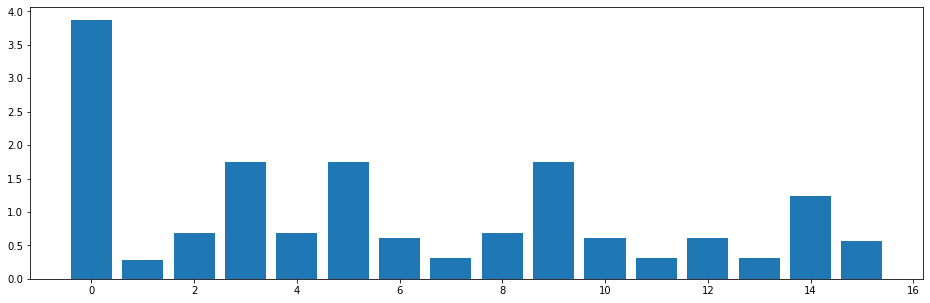

most likey basis:   1
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [0 0 0 1 1 1 1]
the number of basis 2

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


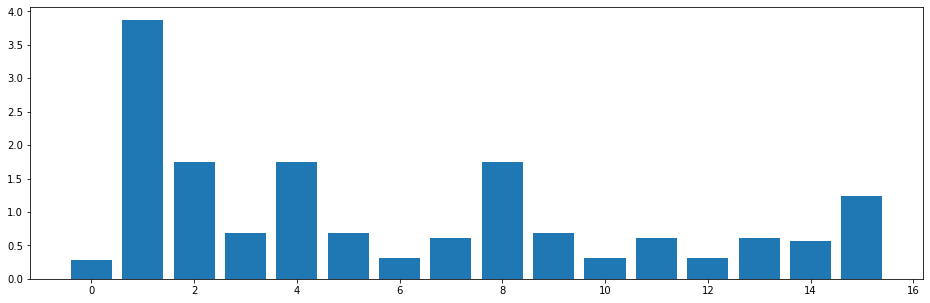

most likey basis:   2
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [0 0 1 0 0 1 1]
the number of basis 3

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


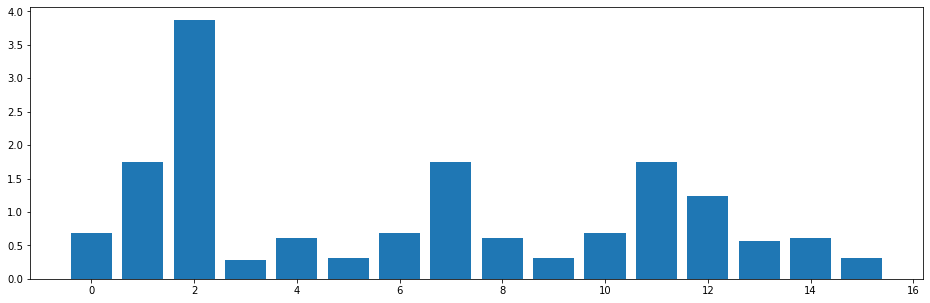

most likey basis:   3
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [0 0 1 1 1 0 0]
the number of basis 4

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


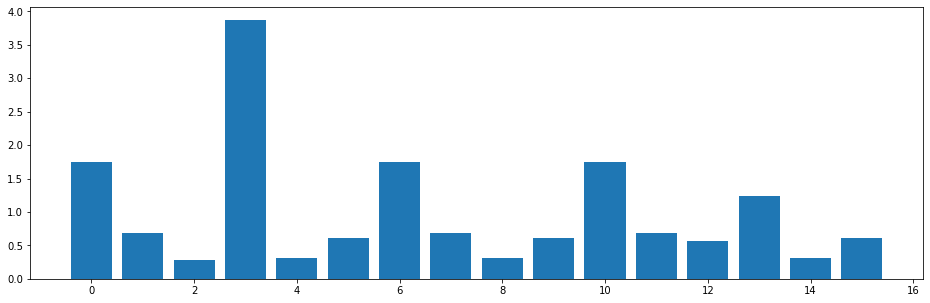

most likey basis:   4
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [0 1 0 0 1 0 1]
the number of basis 5

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


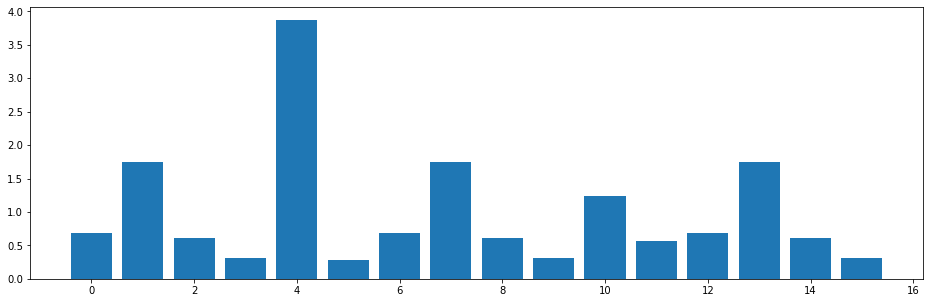

most likey basis:   5
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [0 1 0 1 0 1 0]
the number of basis 6

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


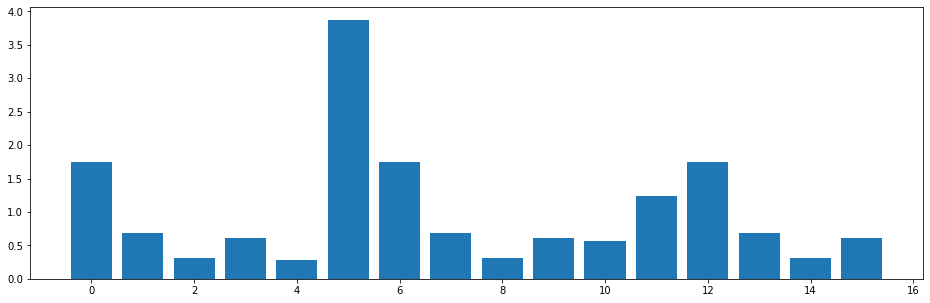

most likey basis:   6
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [0 1 1 0 1 1 0]
the number of basis 7

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


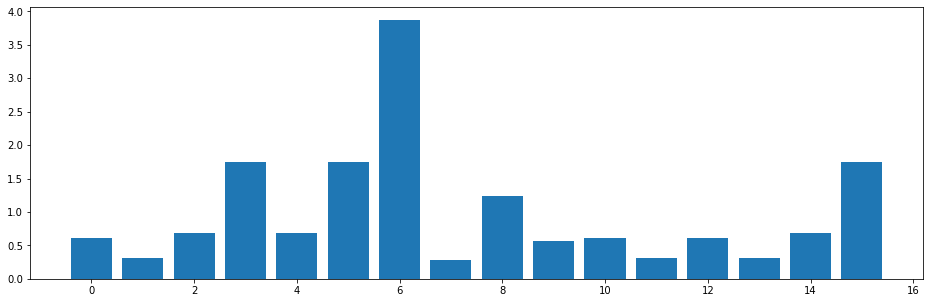

most likey basis:   7
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [0 1 1 1 0 0 1]
the number of basis 8

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


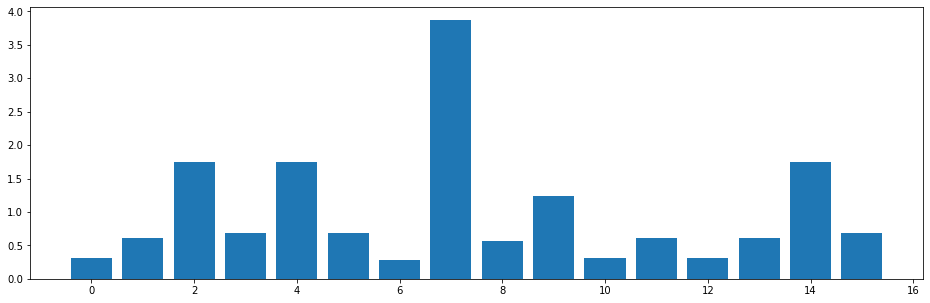

most likey basis:   8
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [1 0 0 0 1 1 0]
the number of basis 9

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


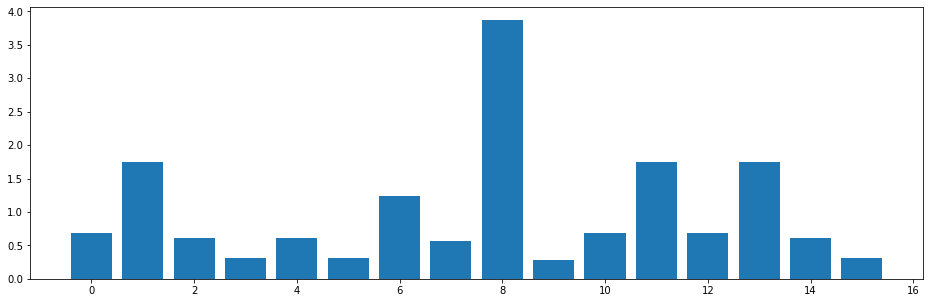

most likey basis:   9
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [1 0 0 1 0 0 1]
the number of basis 10

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


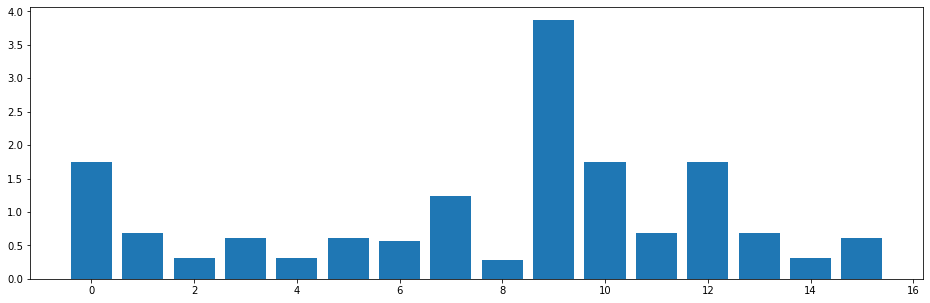

most likey basis:   10
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [1 0 1 0 1 0 1]
the number of basis 11

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


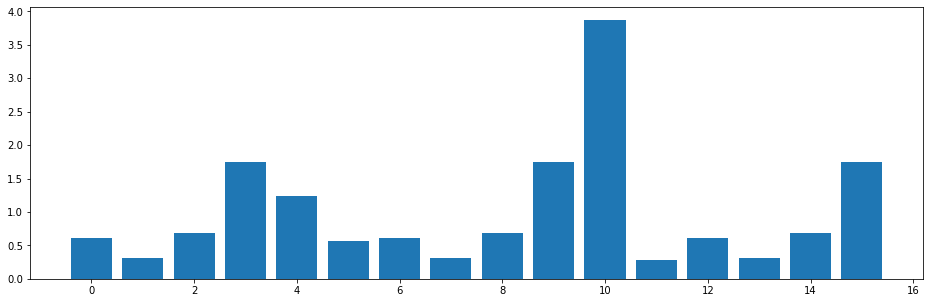

most likey basis:   11
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [1 0 1 1 0 1 0]
the number of basis 12

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


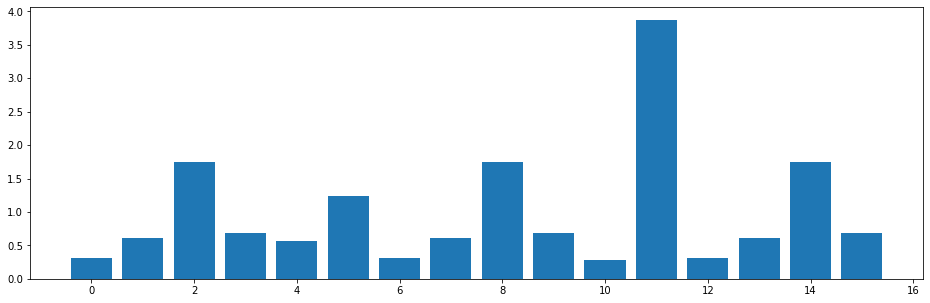

most likey basis:   12
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [1 1 0 0 0 1 1]
the number of basis 13

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


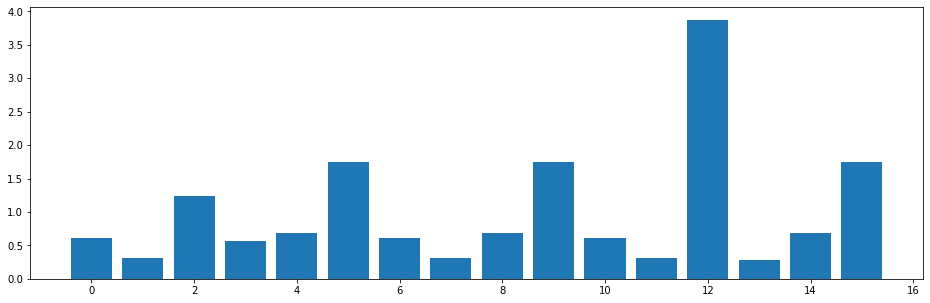

most likey basis:   13
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [1 1 0 1 1 0 0]
the number of basis 14

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


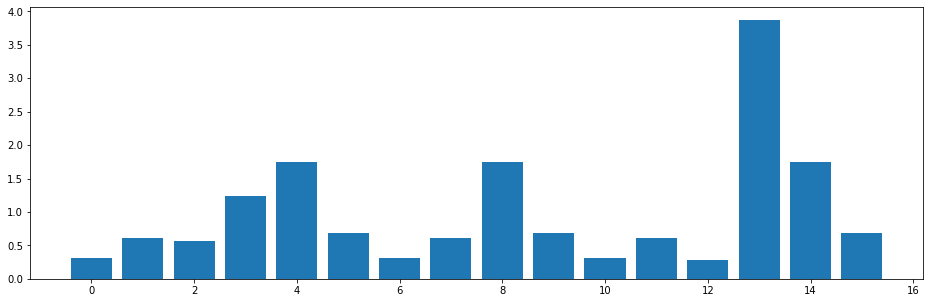

most likey basis:   14
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [1 1 1 0 0 0 0]
the number of basis 15

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


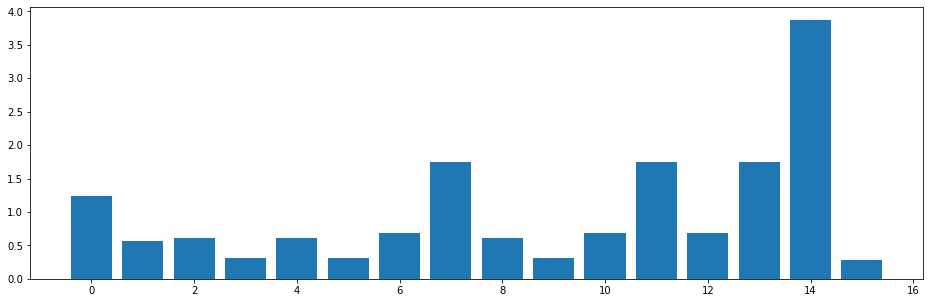

most likey basis:   15
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
y =  [1 1 1 1 1 1 1]
the number of basis 16

 Average expectation using QAOA with fine grid :  [[3.22129004e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.78917254]]

 Optimal gamma :  3.0

 Optimal beta :  2.8000000000000003


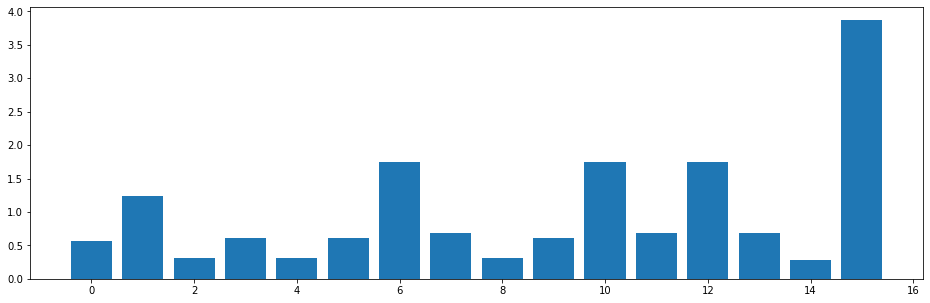

most likey basis:   16
Good Job!!!!!!
---------------
correct rate:  100.0 %


In [4]:
G_oringin = np.array([[1,0,0,0,1,1,0],
              [0,1,0,0,1,0,1],
              [0,0,1,0,0,1,1],
              [0,0,0,1,1,1,1]])
G_oringinT = G_oringin.T

n = G_oringin.shape[0]
u=0

for k in range(2**n):
    print("$$$$$$$$$$$$$$$$$$$")
    message = basis(n)[k]
    y = row_binary(message.dot(G_oringin))
    print("y = ",y)
    C = sum((1-2*y[a])*Cjk_generator(G_oringinT[a]) for a in range(G_oringinT.shape[0]))
    B = B_generator(G_oringinT.shape[1])
    s = init_s(n)
    s_d = (s).T
    print("the number of basis",k+1)

    #run the program
    start_time = time.time()
    step_size   = 0.05
    result_array = np.zeros(shape=(int(3.14/step_size)+1, int(3.14/step_size)+1))
    a_gamma         = np.arange(0, np.pi, step_size)
    a_beta          = np.arange(0, np.pi, step_size)
    #print("Numbers of iteration: ",(pow((int(3.14/step_size)+1),2)))
    f_p_max = 0
    f_p_max_gamma = 0
    f_p_max_beta = 0
    f_psum = 0

    for i in range(0, int(3.14/step_size)+1):           # i for a_gamma
        for j in range(0, int(3.14/step_size)+1):       # j for a_beta

            #Construct U_C
            U_C = np.asmatrix(expm(-1j*2*a_gamma[i]*C))
            #Construct U_B
            U_B = expm(-1j*a_beta[j]*B)


            #Construct expection of each subgraph
            state = (U_B.dot(U_C)).dot(s).reshape(pow(2,n),1) # ket
            state_d = (state.conjugate()).T # bra


            f_p = (state_d.dot(C)).dot(state)
            f_psum += f_p

            if f_p.real > f_p_max:
                f_p_max = f_p.real
                f_p_max_gamma = a_gamma[i]
                f_p_max_beta = a_beta[j]

            result_array[i][j] = f_p.real
    print("\n Average expectation using QAOA with fine grid : ",(f_psum/pow(len(a_gamma),2)).real)       
    print("\n Maximum expectation using QAOA with fine grid : ",f_p_max)
    print("\n Optimal gamma : ",f_p_max_gamma)
    print("\n Optimal beta : ",f_p_max_beta)


    end_time = time.time()
    #print("\n Runningtime : ",end_time - start_time)
    c = converter(message)
    r = np.ones(2**len(message))
    #Construct U_C
    U_C = np.asmatrix(expm(-1j*2*f_p_max_gamma*C))
    #Construct U_B
    U_B = expm(-1j*f_p_max_beta*B)


    #Construct expection of each subgraph
    state = (U_B.dot(U_C)).dot(r).reshape(pow(2,n),1) # ket
    prob=[]
    for i in range(len(state)):
        p = (state[i].real)**2 + (state[i].imag)**2
        np.array(prob.append(float(p)))      
    plt.rcParams['figure.figsize'] = [16, 5]
    plt.bar(range(0, len(state)),prob)
    plt.show()
    print("most likey basis:  ",int(np.where(prob==np.max(prob))[0])+1)
    if int(k+1) != int(np.where(prob==np.max(prob))[0]+1):
        print("CANNOT correct！！！！！！")
    else:
        print("Good Job!!!!!!")
        u+=1
    
print("---------------")
print('correct rate: ',u/16*100,'%')



# Oringinal with one bit error

# Generate one bit error pattern

In [4]:
w1 = []
for i in range(G_oringin.shape[1]):
    o = np.zeros(G_oringin.shape[1])
    o[i]=1
    w1.append(o)
print(w1)

[array([1., 0., 0., 0., 0., 0., 0.]), array([0., 1., 0., 0., 0., 0., 0.]), array([0., 0., 1., 0., 0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0.]), array([0., 0., 0., 0., 0., 1., 0.]), array([0., 0., 0., 0., 0., 0., 1.])]


$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 0. 0. 0.]
y =  [1. 0. 0. 0. 0. 0. 0.]
most likey basis:   10
CANNOT correct！！！！！！


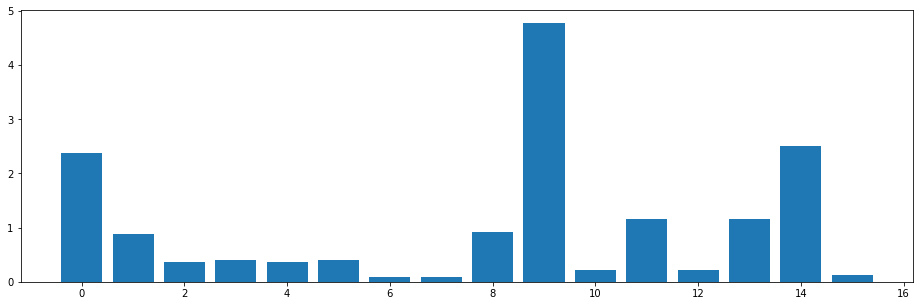

---------------
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 0.]
y =  [0. 1. 0. 0. 0. 0. 0.]
most likey basis:   6
CANNOT correct！！！！！！


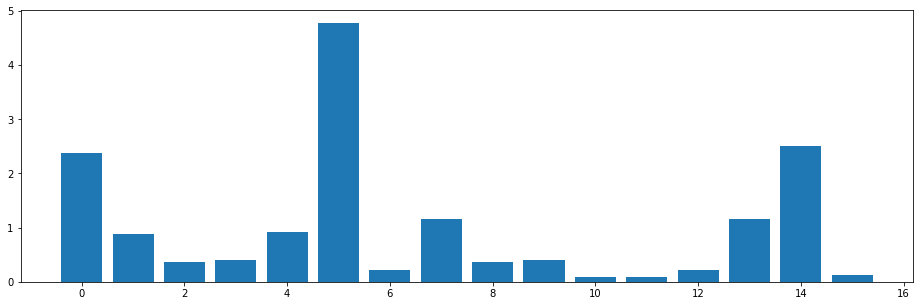

---------------
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 0.]
y =  [0. 0. 1. 0. 0. 0. 0.]
most likey basis:   4
CANNOT correct！！！！！！


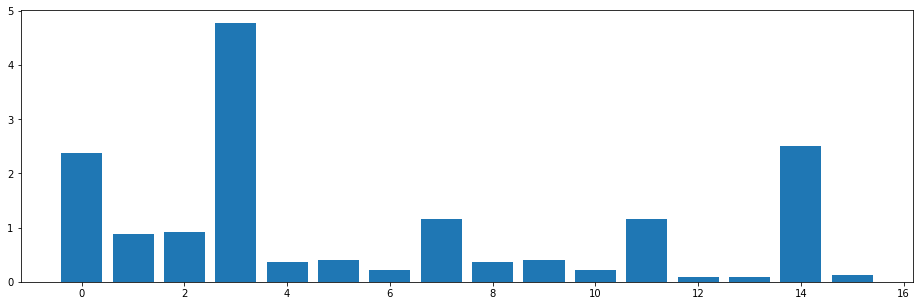

---------------
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 1. 0. 0. 0.]
y =  [0. 0. 0. 1. 0. 0. 0.]
most likey basis:   1
Good Job!!!!!!
u: 1


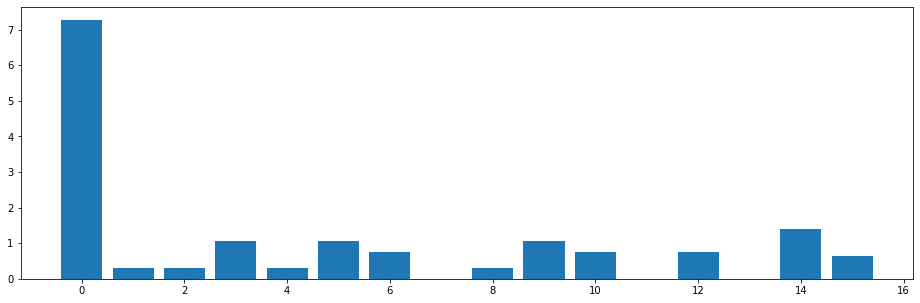

---------------
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 0. 0.]
y =  [0. 0. 0. 0. 1. 0. 0.]
most likey basis:   1
Good Job!!!!!!
u: 2


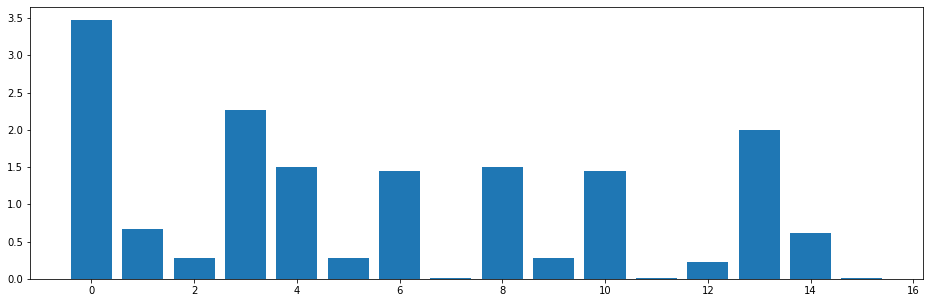

---------------
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 1. 0.]
y =  [0. 0. 0. 0. 0. 1. 0.]
most likey basis:   1
Good Job!!!!!!
u: 3


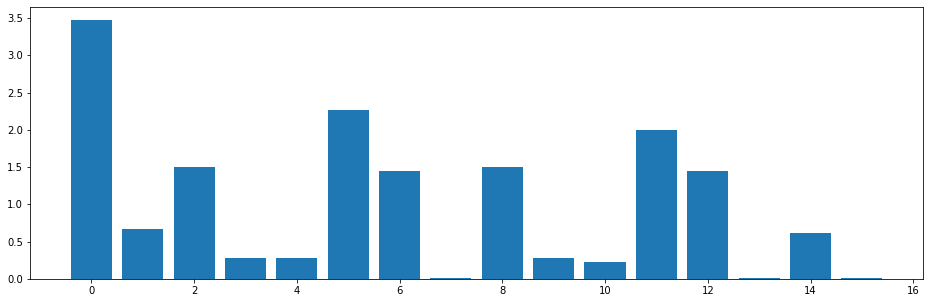

---------------
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 0. 1.]
y =  [0. 0. 0. 0. 0. 0. 1.]
most likey basis:   1
Good Job!!!!!!
u: 4


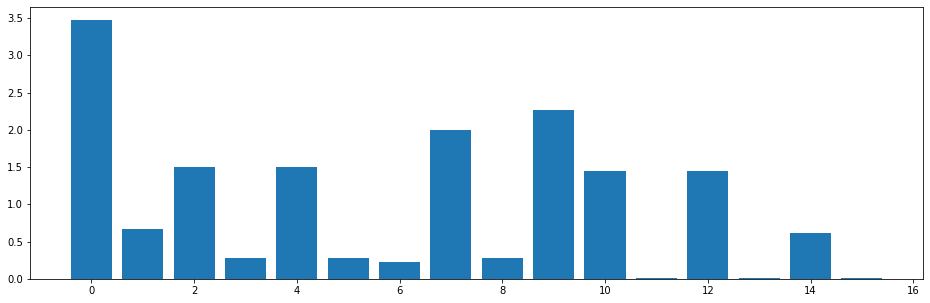

---------------
correct rate:  57.14285714285714 %


In [13]:
G_oringin = np.array([[1,0,0,0,1,1,0],
              [0,1,0,0,1,0,1],
              [0,0,1,0,0,1,1],
              [0,0,0,1,1,1,1]])
G_oringinT = G_oringin.T
cor_rate=[]
n = G_oringin.shape[0]
u = 0
for m in range(len(w1)):
    print("$$$$$$$$$$$$$$$$$$$")
    message = basis(n)[0]
    w = w1[m] 
    print("w = ",w)
    y = row_binary(message.dot(G_oringin)+w)
    print("y = ",y)
    C = sum((1-2*y[a])*Cjk_generator(G_oringinT[a]) for a in range(G_oringinT.shape[0]))
    B = B_generator(G_oringinT.shape[1])
    s = init_s(n)
    s_d = (s).T
    #run the program
    start_time = time.time()
    step_size   = 0.05
    result_array = np.zeros(shape=(int(3.14/step_size)+1, int(3.14/step_size)+1))
    a_gamma         = np.arange(0, np.pi, step_size)
    a_beta          = np.arange(0, np.pi, step_size)
    #print("Numbers of iteration: ",(pow((int(3.14/step_size)+1),2)))
    f_p_max = 0
    f_p_max_gamma = 0
    f_p_max_beta = 0
    f_psum = 0

    for i in range(0, int(3.14/step_size)+1):           # i for a_gamma
        for j in range(0, int(3.14/step_size)+1):       # j for a_beta

            #Construct U_C
            U_C = np.asmatrix(expm(-1j*2*a_gamma[i]*C))
            #Construct U_B
            U_B = expm(-1j*a_beta[j]*B)


            #Construct expection of each subgraph
            state = (U_B.dot(U_C)).dot(s).reshape(pow(2,n),1) # ket
            state_d = (state.conjugate()).T # bra


            f_p = (state_d.dot(C)).dot(state)
            f_psum += f_p


            if f_p.real > f_p_max:
                f_p_max = f_p.real
                f_p_max_gamma = a_gamma[i]
                f_p_max_beta = a_beta[j]

            result_array[i][j] = f_p.real
#         print("\n Average expectation using QAOA with fine grid : ",(f_psum/pow(len(a_gamma),2)).real)       
#         print("\n Maximum expectation using QAOA with fine grid : ",f_p_max)
#         print("\n Optimal gamma : ",f_p_max_gamma)
#         print("\n Optimal beta : ",f_p_max_beta)


    end_time = time.time()
    #print("\n Runningtime : ",end_time - start_time)
    c = converter(message)
    r = np.ones(2**len(message))

    #Construct U_C
    U_C = np.asmatrix(expm(-1j*2*f_p_max_gamma*C))
    #Construct U_B
    U_B = expm(-1j*f_p_max_beta*B)


    #Construct expection of each subgraph
    state = (U_B.dot(U_C)).dot(r).reshape(pow(2,n),1) # ket
    prob=[]
    for i in range(len(state)):
        p = (state[i].real)**2 + (state[i].imag)**2
        np.array(prob.append(float(p)))      
    e = np.max(prob)
    print("most likey basis:  ",int(np.where(prob==np.max(prob))[0])+1)
    if int(1) != int(np.where(prob==np.max(prob))[0]+1):
        print("CANNOT correct！！！！！！")
    else:
        print("Good Job!!!!!!")
        u+=1
        print("u:", u)
        
    plt.rcParams['figure.figsize'] = [16, 5]
    plt.bar(range(0, len(state)),prob)
    plt.show()
    print("---------------")
print('correct rate: ',u/7*100,'%')
 

# Apply QAOA twice

$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 0. 0. 0.]
y =  [1. 0. 0. 0. 0. 0. 0.]

 Runningtime :  1446.5741937160492
Good Job!!!!!!


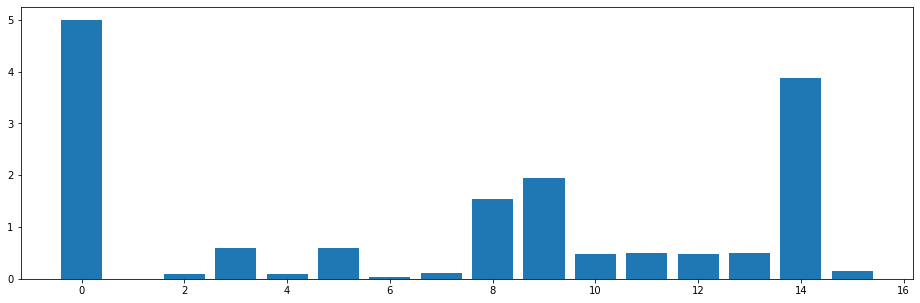

---------------
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 0.]
y =  [0. 1. 0. 0. 0. 0. 0.]

 Runningtime :  1455.9963850975037
Good Job!!!!!!


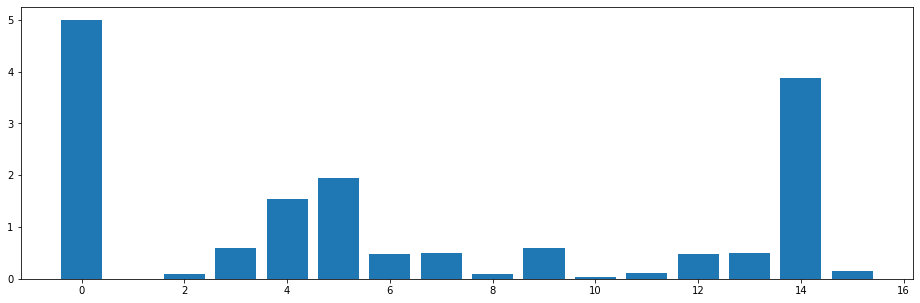

---------------
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 0.]
y =  [0. 0. 1. 0. 0. 0. 0.]

 Runningtime :  1465.0224523544312
Good Job!!!!!!


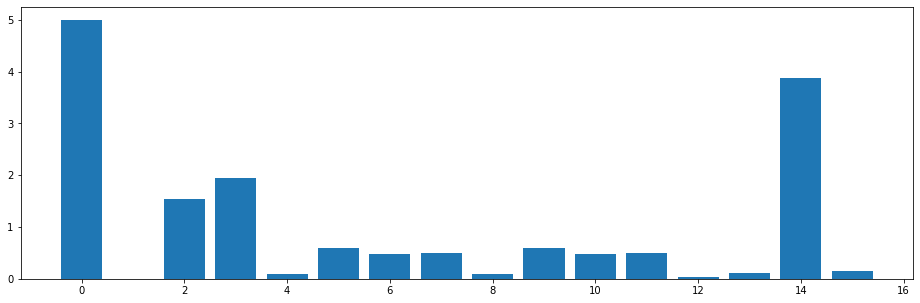

---------------
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 1. 0. 0. 0.]
y =  [0. 0. 0. 1. 0. 0. 0.]

 Runningtime :  1456.5032110214233
Good Job!!!!!!


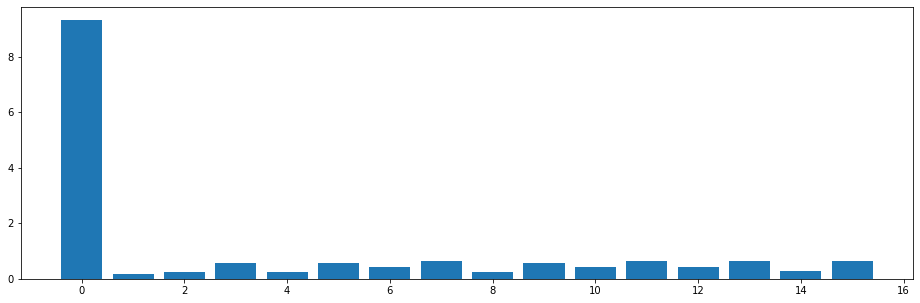

---------------
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 0. 0.]
y =  [0. 0. 0. 0. 1. 0. 0.]

 Runningtime :  1465.0111050605774
Good Job!!!!!!


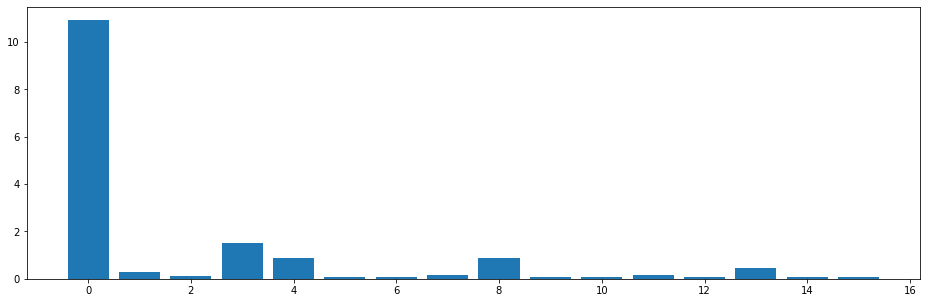

---------------
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 1. 0.]
y =  [0. 0. 0. 0. 0. 1. 0.]

 Runningtime :  1458.6343820095062
Good Job!!!!!!


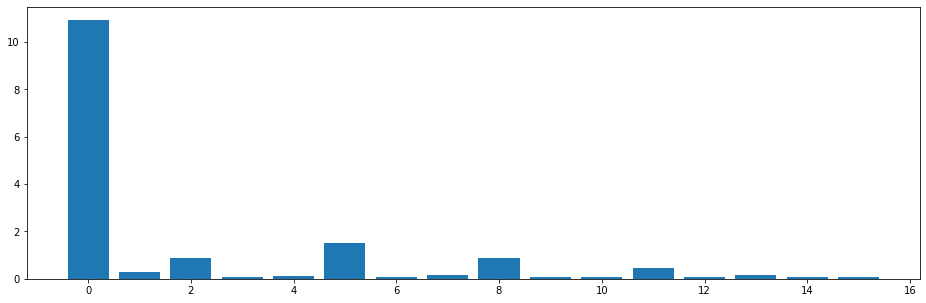

---------------
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 0. 1.]
y =  [0. 0. 0. 0. 0. 0. 1.]

 Runningtime :  1458.4109082221985
Good Job!!!!!!


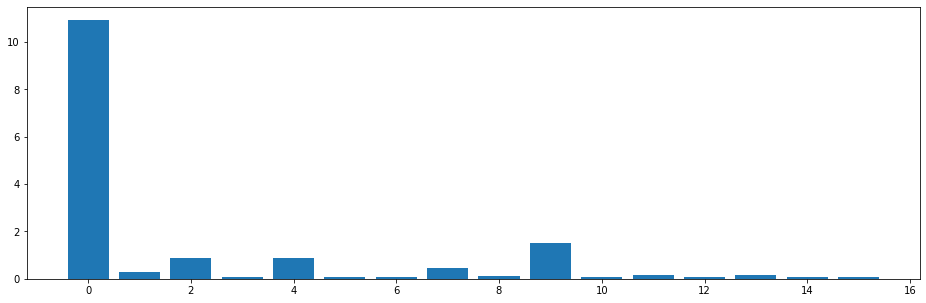

---------------
correct rate:  100.0 %


In [24]:
G_oringin = np.array([[1,0,0,0,1,1,0],
              [0,1,0,0,1,0,1],
              [0,0,1,0,0,1,1],
              [0,0,0,1,1,1,1]])
G_oringinT = G_oringin.T
cor_rate=[]
n = G_oringin.shape[0]
u=0
for o in range(len(w1)):
    print("$$$$$$$$$$$$$$$$$$$")
    message = basis(n)[0]
    w = w1[o] 
    print("w = ",w)
    y = w
    print("y = ",y)
    C = sum((1-2*y[a])*Cjk_generator(G_oringinT[a]) for a in range(G_oringinT.shape[0]))
    B = B_generator(G_oringinT.shape[1])
    s = init_s(n)
    s_d = (s).T
    #run the program
    
    step_size   = 0.1
    result_array = np.zeros(shape=(int(3.14/step_size)+1, int(3.14/step_size)+1,int(3.14/step_size)+1, int(3.14/step_size)+1))
    a_gamma1         = np.arange(0, np.pi, step_size)
    a_beta1          = np.arange(0, np.pi, step_size)
    a_gamma2         = np.arange(0, np.pi, step_size)
    a_beta2          = np.arange(0, np.pi, step_size)
    #print("Numbers of iteration: ",(pow((int(3.14/step_size)+1),2)))
    f_p_max = 0
    f_p_max_gamma1 = 0
    f_p_max_beta1 = 0
    f_p_max_gamma2 = 0
    f_p_max_beta2 = 0
    f_psum = 0

    start_time = time.time()
    
    for m in range(0, int(3.14/step_size)+1):           # i for a_gamma
        for l in range(0, int(3.14/step_size)+1): 
            for i in range(0, int(3.14/step_size)+1):           # i for a_gamma
                for j in range(0, int(3.14/step_size)+1):       # j for a_beta
                        
                        #Construct U_C1
                        U_C1 = np.asmatrix(expm(-1j*2*a_gamma1[i]*C))
                        #Construct U_B1
                        U_B1 = expm(-1j*a_beta1[j]*B)
                        #Construct U_C2
                        U_C2 = np.asmatrix(expm(-1j*2*a_gamma2[m]*C))
                        #Construct U_B3
                        U_B2 = expm(-1j*a_beta2[n]*B)


                        #Construct expection of each subgraph
                        state = ((U_B2.dot(U_C2)).dot((U_B1.dot(U_C1)).dot(s))).reshape(pow(2,n),1) # ket
                        state_d = (state.conjugate()).T # bra


                        f_p = (state_d.dot(C)).dot(state)
                        f_psum += f_p


                        if f_p.real > f_p_max:
                            f_p_max = f_p.real
                            f_p_max_gamma1 = a_gamma1[i]
                            f_p_max_beta1 = a_beta1[j]
                            f_p_max_gamma2 = a_gamma2[m]
                            f_p_max_beta2 = a_beta2[n]
                        result_array[i][j][m][n] = f_p.real
                #         print("\n Average expectation using QAOA with fine grid : ",(f_psum/pow(len(a_gamma),2)).real)       
                #         print("\n Maximum expectation using QAOA with fine grid : ",f_p_max)
                #         print("\n Optimal gamma : ",f_p_max_gamma)
                #         print("\n Optimal beta : ",f_p_max_beta)


    
    
    end_time = time.time()
    print("\n Runningtime : ",end_time - start_time)
    #print("\n Runningtime : ",end_time - start_time)
    c = converter(message)
    r = np.ones(2**len(message)).reshape(pow(2,n),1)
    
    #Construct U_C
    U_C1 = np.asmatrix(expm(-1j*2*f_p_max_gamma1*C))
    U_C2 = np.asmatrix(expm(-1j*2*f_p_max_gamma2*C))
    #Construct U_B
    U_B1 = expm(-1j*f_p_max_beta1*B)
    U_B2 = expm(-1j*f_p_max_beta2*B)



    #Construct expection of each subgraph
    state = (U_B2.dot(U_C2)).dot((U_B1.dot(U_C1)).dot(r)).reshape(pow(2,n),1) # ket
    prob=[]
    for i in range(len(state)):
        p = (state[i].real)**2 + (state[i].imag)**2
        np.array(prob.append(float(p)))      
    e = np.max(prob)
    #print("most likey basis:  ",int(np.where(prob==np.max(prob))[0])+1)
    if int(np.where(prob==e)[0][0]+1)!=1:
        print("CANNOT correct！！！！！！")
    else:
        print("Good Job!!!!!!")
        u+=1
    plt.rcParams['figure.figsize'] = [16, 5]
    plt.bar(range(0, len(state)),prob)
    plt.show()
    print("---------------")
print('correct rate: ',u/7*100,'%')
 

# Oringinal with two bit error

In [60]:
w2 = []
comb = combinations([a for a in range(7)], 2) 
comb = list(comb)
for a in range(len(comb)):
    o = np.zeros(G_oringin.shape[1])
    j = comb[a][0]
    k = comb[a][1]
    o[j]=1
    o[k]=1
    w2.append(o)
   
    


In [61]:
G_oringin = np.array([[1,0,0,0,1,1,0],
              [0,1,0,0,1,0,1],
              [0,0,1,0,0,1,1],
              [0,0,0,1,1,1,1]])
G_oringinT = G_oringin.T
cor_rate=[]
n = G_oringin.shape[0]

for m in range(len(w2)):
    u=0
    for k in range(2**n):
        print("$$$$$$$$$$$$$$$$$$$")
        message = basis(n)[k]
        w = w2[m] 
        print("w = ",w)
        y = row_binary(message.dot(G_oringin)+w)
        print("y = ",y)
        C = sum((1-2*y[a])*Cjk_generator(G_oringinT[a]) for a in range(G_oringinT.shape[0]))
        B = B_generator(G_oringinT.shape[1])
        s = init_s(n)
        s_d = (s).T
        print("the number of basis",k+1)

        #run the program
        start_time = time.time()
        step_size   = 0.05
        result_array = np.zeros(shape=(int(3.14/step_size)+1, int(3.14/step_size)+1))
        a_gamma         = np.arange(0, np.pi, step_size)
        a_beta          = np.arange(0, np.pi, step_size)
        #print("Numbers of iteration: ",(pow((int(3.14/step_size)+1),2)))
        f_p_max = 0
        f_p_max_gamma = 0
        f_p_max_beta = 0
        f_psum = 0

        for i in range(0, int(3.14/step_size)+1):           # i for a_gamma
            for j in range(0, int(3.14/step_size)+1):       # j for a_beta

                #Construct U_C
                U_C = np.asmatrix(expm(-1j*2*a_gamma[i]*C))
                #Construct U_B
                U_B = expm(-1j*a_beta[j]*B)


                #Construct expection of each subgraph
                state = (U_B.dot(U_C)).dot(s).reshape(pow(2,n),1) # ket
                state_d = (state.conjugate()).T # bra


                f_p = (state_d.dot(C)).dot(state)
                f_psum += f_p


                if f_p.real > f_p_max:
                    f_p_max = f_p.real
                    f_p_max_gamma = a_gamma[i]
                    f_p_max_beta = a_beta[j]

                result_array[i][j] = f_p.real
#         print("\n Average expectation using QAOA with fine grid : ",(f_psum/pow(len(a_gamma),2)).real)       
#         print("\n Maximum expectation using QAOA with fine grid : ",f_p_max)
#         print("\n Optimal gamma : ",f_p_max_gamma)
#         print("\n Optimal beta : ",f_p_max_beta)


        end_time = time.time()
        #print("\n Runningtime : ",end_time - start_time)
        c = converter(message)
        r = np.ones(2**len(message))

        #Construct U_C
        U_C = np.asmatrix(expm(-1j*2*f_p_max_gamma*C))
        #Construct U_B
        U_B = expm(-1j*f_p_max_beta*B)


        #Construct expection of each subgraph
        state = (U_B.dot(U_C)).dot(r).reshape(pow(2,n),1) # ket
        prob=[]
        for i in range(len(state)):
            p = (state[i].real)**2 + (state[i].imag)**2
            np.array(prob.append(float(p)))      
        e = np.max(prob)
        print("most likey basis:  ",int(np.where(prob==np.max(prob))[0])+1)
        if int(k+1) != int(np.where(prob==np.max(prob))[0]+1):
            print("CANNOT correct！！！！！！")
        else:
            print("Good Job!!!!!!")
            u+=1

    print("---------------")
    print('correct rate: ',u/16*100,'%')
    cor_rate.append(u/16*100)
print('----------------------')
print(cor_rate)




$$$$$$$$$$$$$$$$$$$
w =  [1. 1. 0. 0. 0. 0. 0.]
y =  [1. 1. 0. 0. 0. 0. 0.]
the number of basis 1
most likey basis:   14
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 1. 0. 0. 0. 0. 0.]
y =  [1. 1. 0. 1. 1. 1. 1.]
the number of basis 2
most likey basis:   13
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 1. 0. 0. 0. 0. 0.]
y =  [1. 1. 1. 0. 0. 1. 1.]
the number of basis 3
most likey basis:   16
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 1. 0. 0. 0. 0. 0.]
y =  [1. 1. 1. 1. 1. 0. 0.]
the number of basis 4
most likey basis:   15
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 1. 0. 0. 0. 0. 0.]
y =  [1. 0. 0. 0. 1. 0. 1.]
the number of basis 5
most likey basis:   10
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 1. 0. 0. 0. 0. 0.]
y =  [1. 0. 0. 1. 0. 1. 0.]
the number of basis 6
most likey basis:   9
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 1. 0. 0. 0. 0. 0.]
y =  [1. 0. 1. 0. 1. 1. 0.]
the number of basis 7
most likey basis:   12
CANNOT correct！！！！！！
$$$$$$$

most likey basis:   2
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 1. 0. 0.]
y =  [0. 0. 1. 0. 0. 0. 1.]
the number of basis 11
most likey basis:   3
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 1. 0. 0.]
y =  [0. 0. 1. 1. 1. 1. 0.]
the number of basis 12
most likey basis:   4
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 1. 0. 0.]
y =  [0. 1. 0. 0. 1. 1. 1.]
the number of basis 13
most likey basis:   5
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 1. 0. 0.]
y =  [0. 1. 0. 1. 0. 0. 0.]
the number of basis 14
most likey basis:   6
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 1. 0. 0.]
y =  [0. 1. 1. 0. 1. 0. 0.]
the number of basis 15
most likey basis:   7
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 1. 0. 0.]
y =  [0. 1. 1. 1. 0. 1. 1.]
the number of basis 16
most likey basis:   8
CANNOT correct！！！！！！
---------------
correct rate:  0.0 %
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 0. 1. 0.]
y =  [1. 0. 0. 0. 0.

most likey basis:   8
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 1. 0. 0. 0.]
y =  [0. 1. 1. 0. 1. 0. 0.]
the number of basis 4
most likey basis:   7
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 1. 0. 0. 0.]
y =  [0. 0. 0. 1. 1. 0. 1.]
the number of basis 5
most likey basis:   2
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 1. 0. 0. 0.]
y =  [0. 0. 0. 0. 0. 1. 0.]
the number of basis 6
most likey basis:   1
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 1. 0. 0. 0.]
y =  [0. 0. 1. 1. 1. 1. 0.]
the number of basis 7
most likey basis:   4
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 1. 0. 0. 0.]
y =  [0. 0. 1. 0. 0. 0. 1.]
the number of basis 8
most likey basis:   3
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 1. 0. 0. 0.]
y =  [1. 1. 0. 1. 1. 1. 0.]
the number of basis 9
most likey basis:   14
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 1. 0. 0. 0.]
y =  [1. 1. 0. 0. 0. 0. 1.]
the number of basis 10
most likey 

most likey basis:   16
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 1.]
y =  [1. 0. 0. 0. 0. 1. 0.]
the number of basis 13
most likey basis:   9
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 1.]
y =  [1. 0. 0. 1. 1. 0. 1.]
the number of basis 14
most likey basis:   10
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 1.]
y =  [1. 0. 1. 0. 0. 0. 1.]
the number of basis 15
most likey basis:   11
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 1.]
y =  [1. 0. 1. 1. 1. 1. 0.]
the number of basis 16
most likey basis:   12
CANNOT correct！！！！！！
---------------
correct rate:  0.0 %
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 1. 0. 0. 0.]
y =  [0. 0. 1. 1. 0. 0. 0.]
the number of basis 1
most likey basis:   4
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 1. 0. 0. 0.]
y =  [0. 0. 1. 0. 1. 1. 1.]
the number of basis 2
most likey basis:   3
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 1. 0. 0. 0.]
y =  [0. 0. 0. 1. 

most likey basis:   7
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 1.]
y =  [0. 1. 1. 1. 0. 1. 1.]
the number of basis 6
most likey basis:   8
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 1.]
y =  [0. 1. 0. 0. 1. 1. 1.]
the number of basis 7
most likey basis:   5
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 1.]
y =  [0. 1. 0. 1. 0. 0. 0.]
the number of basis 8
most likey basis:   6
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 1.]
y =  [1. 0. 1. 0. 1. 1. 1.]
the number of basis 9
most likey basis:   11
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 1.]
y =  [1. 0. 1. 1. 0. 0. 0.]
the number of basis 10
most likey basis:   12
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 1.]
y =  [1. 0. 0. 0. 1. 0. 0.]
the number of basis 11
most likey basis:   9
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 1.]
y =  [1. 0. 0. 1. 0. 1. 1.]
the number of basis 12
most lik

most likey basis:   16
Good Job!!!!!!
---------------
correct rate:  100.0 %
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 1. 0.]
y =  [0. 0. 0. 0. 1. 1. 0.]
the number of basis 1
most likey basis:   2
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 1. 0.]
y =  [0. 0. 0. 1. 0. 0. 1.]
the number of basis 2
most likey basis:   1
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 1. 0.]
y =  [0. 0. 1. 0. 1. 0. 1.]
the number of basis 3
most likey basis:   4
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 1. 0.]
y =  [0. 0. 1. 1. 0. 1. 0.]
the number of basis 4
most likey basis:   3
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 1. 0.]
y =  [0. 1. 0. 0. 0. 1. 1.]
the number of basis 5
most likey basis:   6
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 1. 0.]
y =  [0. 1. 0. 1. 1. 0. 0.]
the number of basis 6
most likey basis:   5
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 1. 0.]
y =  [0. 1. 1. 0. 0. 0. 0.]
t

# Apply a full rank matrix on G

In [12]:
G_oringin = np.array([[1,0,0,0,1,1,0],
              [0,1,0,0,1,0,1],
              [0,0,1,0,0,1,1],
              [0,0,0,1,1,1,1]])
P = np.array([[1,0,0,0],
              [0,1,1,0],
              [0,1,1,1],
              [1,1,0,1]])
print(np.linalg.matrix_rank(P))
G = matrix_binary(P.dot(G_oringin))
print(G)

4
[[1 0 0 0 1 1 0]
 [0 1 1 0 1 1 0]
 [0 1 1 1 0 0 1]
 [1 1 0 1 1 0 0]]


# Without error

$$$$$$$$$$$$$$$$$$$
y =  [0 0 0 0 0 0 0]
the number of basis 1
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  4.76967978477478
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   1
Good Job!!!!!!


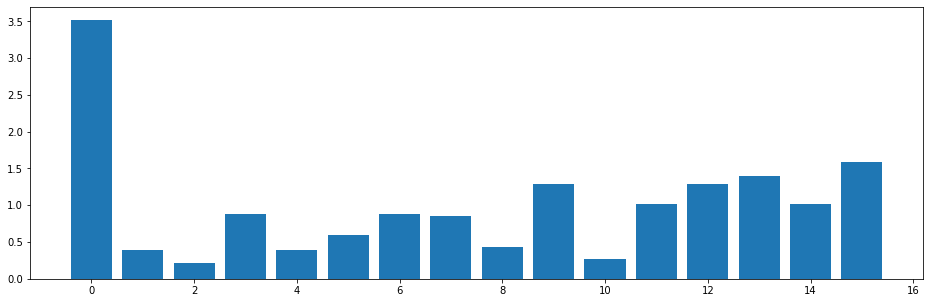

$$$$$$$$$$$$$$$$$$$
y =  [1 1 0 1 1 0 0]
the number of basis 2
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  4.678330898284912
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   2
Good Job!!!!!!


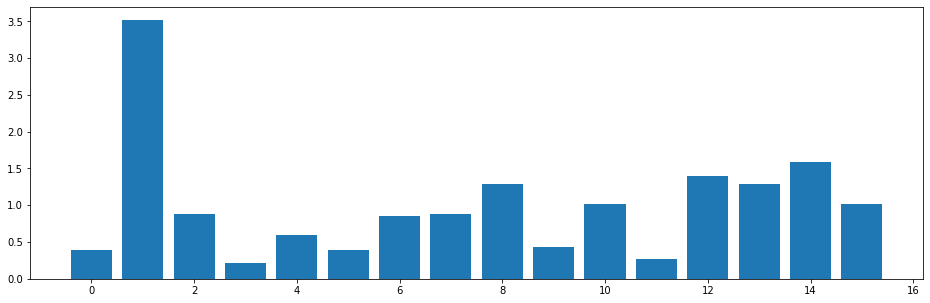

$$$$$$$$$$$$$$$$$$$
y =  [0 1 1 1 0 0 1]
the number of basis 3
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  4.817385911941528
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   3
Good Job!!!!!!


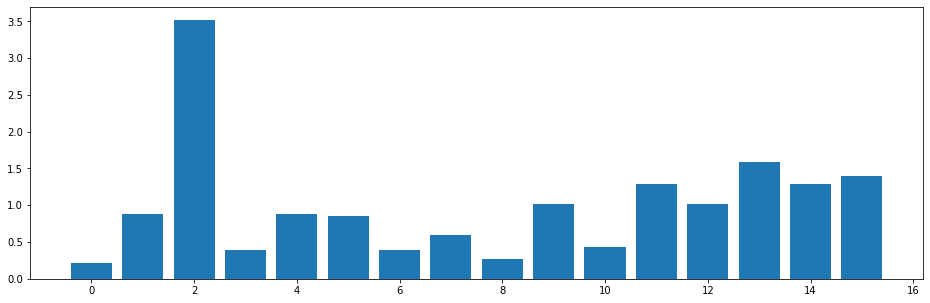

$$$$$$$$$$$$$$$$$$$
y =  [1 0 1 0 1 0 1]
the number of basis 4
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  4.7468788623809814
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   4
Good Job!!!!!!


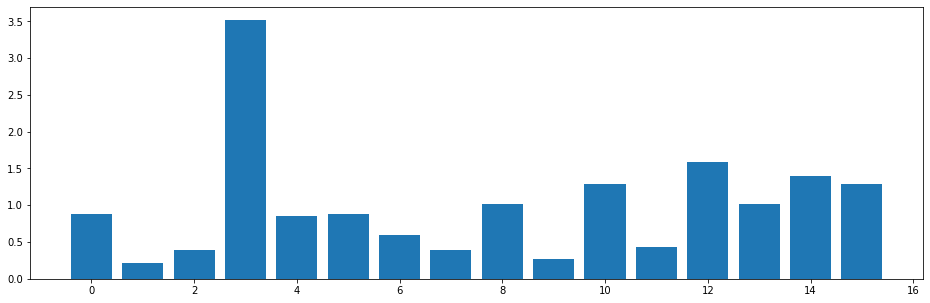

$$$$$$$$$$$$$$$$$$$
y =  [0 1 1 0 1 1 0]
the number of basis 5
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  4.739444255828857
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   5
Good Job!!!!!!


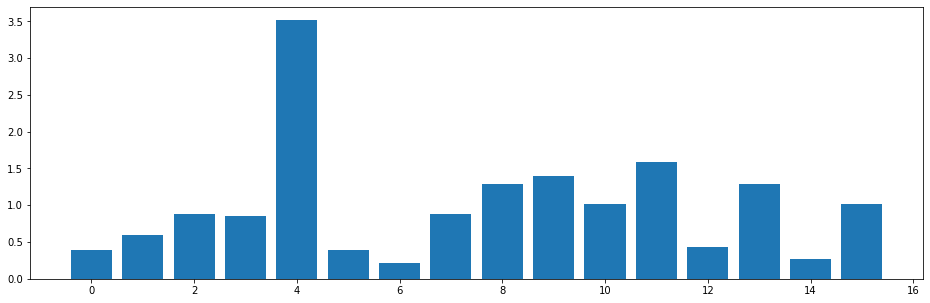

$$$$$$$$$$$$$$$$$$$
y =  [1 0 1 1 0 1 0]
the number of basis 6
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  4.844073057174683
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   6
Good Job!!!!!!


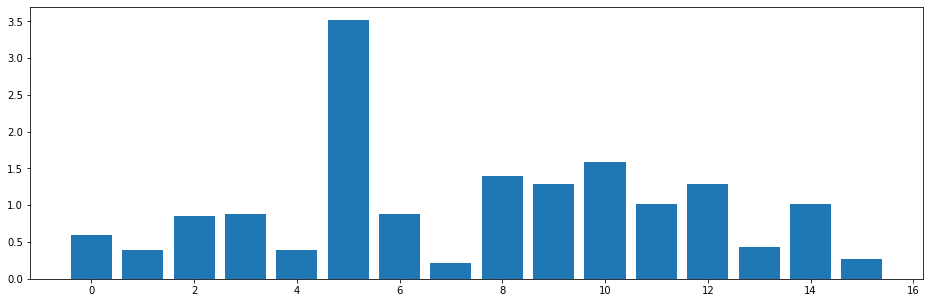

$$$$$$$$$$$$$$$$$$$
y =  [0 0 0 1 1 1 1]
the number of basis 7
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  4.691705703735352
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   7
Good Job!!!!!!


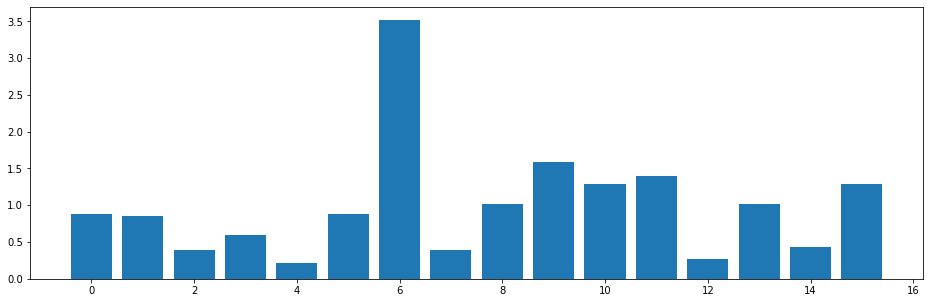

$$$$$$$$$$$$$$$$$$$
y =  [1 1 0 0 0 1 1]
the number of basis 8
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  4.952013969421387
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   8
Good Job!!!!!!


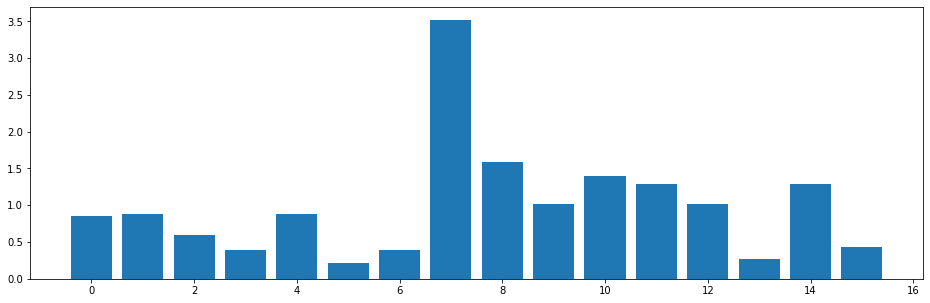

$$$$$$$$$$$$$$$$$$$
y =  [1 0 0 0 1 1 0]
the number of basis 9
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  4.72893214225769
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   9
Good Job!!!!!!


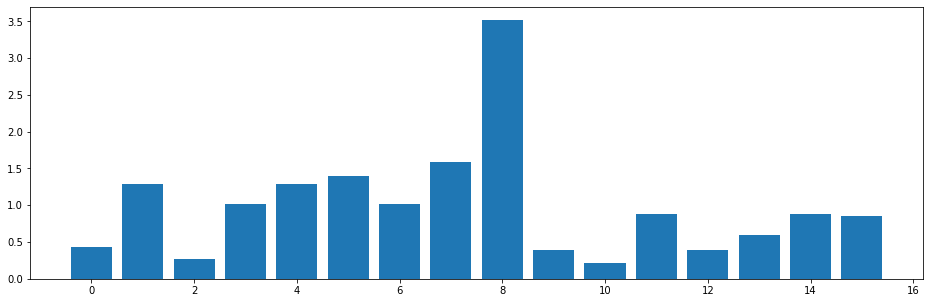

$$$$$$$$$$$$$$$$$$$
y =  [0 1 0 1 0 1 0]
the number of basis 10
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  4.961747884750366
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   10
Good Job!!!!!!


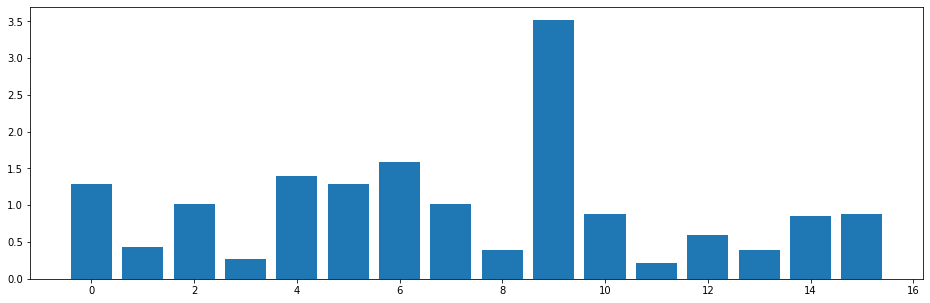

$$$$$$$$$$$$$$$$$$$
y =  [1 1 1 1 1 1 1]
the number of basis 11
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  4.744397878646851
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   11
Good Job!!!!!!


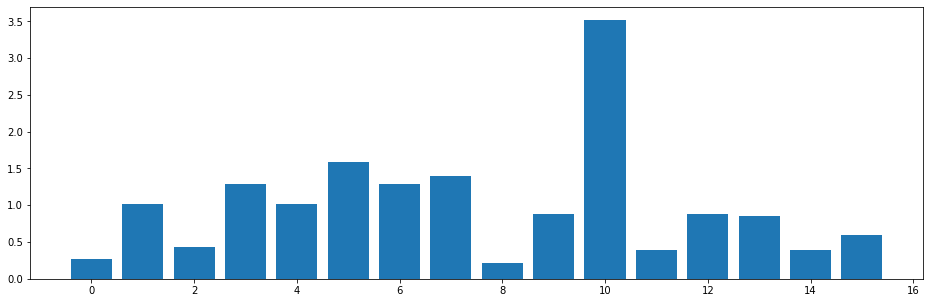

$$$$$$$$$$$$$$$$$$$
y =  [0 0 1 0 0 1 1]
the number of basis 12
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  5.057020902633667
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   12
Good Job!!!!!!


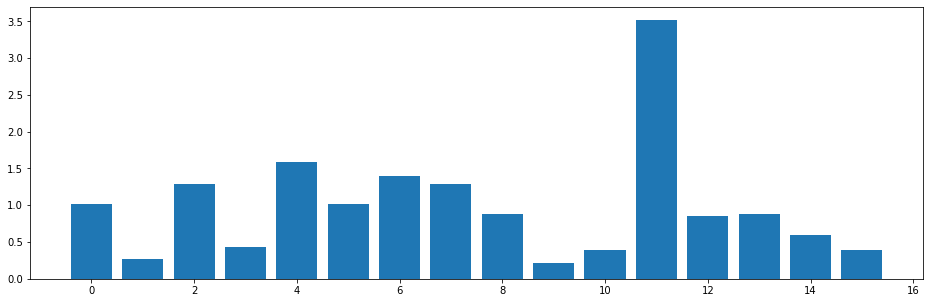

$$$$$$$$$$$$$$$$$$$
y =  [1 1 1 0 0 0 0]
the number of basis 13
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  4.864212989807129
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   13
Good Job!!!!!!


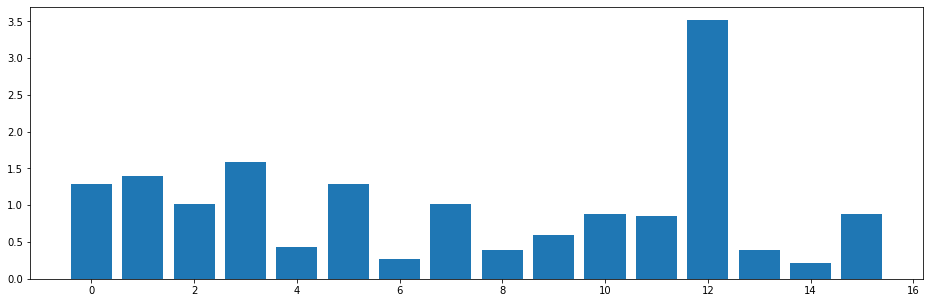

$$$$$$$$$$$$$$$$$$$
y =  [0 0 1 1 1 0 0]
the number of basis 14
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  6.546276807785034
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   14
Good Job!!!!!!


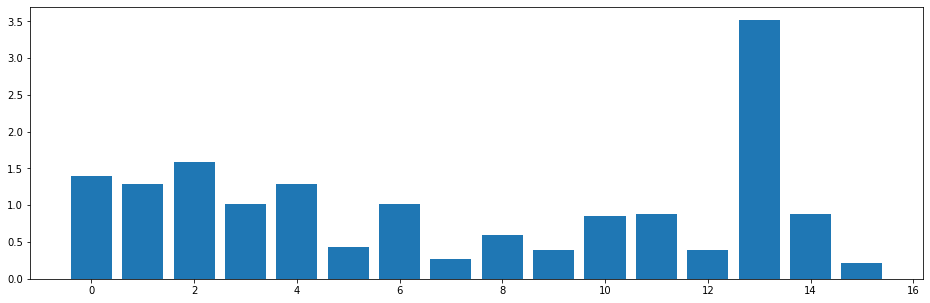

$$$$$$$$$$$$$$$$$$$
y =  [1 0 0 1 0 0 1]
the number of basis 15
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  7.499556064605713
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   15
Good Job!!!!!!


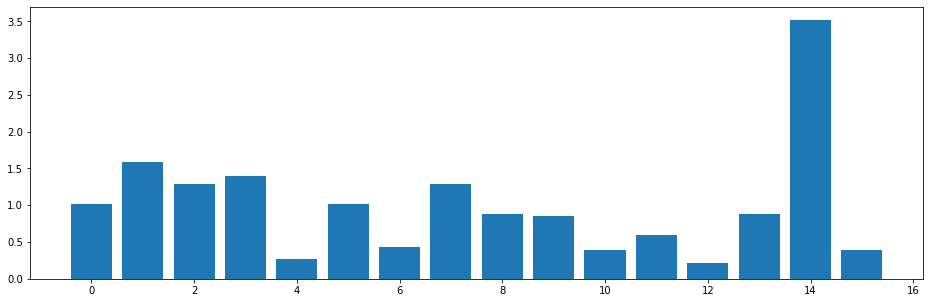

$$$$$$$$$$$$$$$$$$$
y =  [0 1 0 0 1 0 1]
the number of basis 16
Numbers of iteration:  3969

 Average expectation using QAOA with fine grid :  [[3.72433598e-07]]

 Maximum expectation using QAOA with fine grid :  [[1.66554725]]

 Optimal gamma :  0.1

 Optimal beta :  0.35000000000000003

 Runningtime :  5.959378004074097
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
most likey basis:   16
Good Job!!!!!!


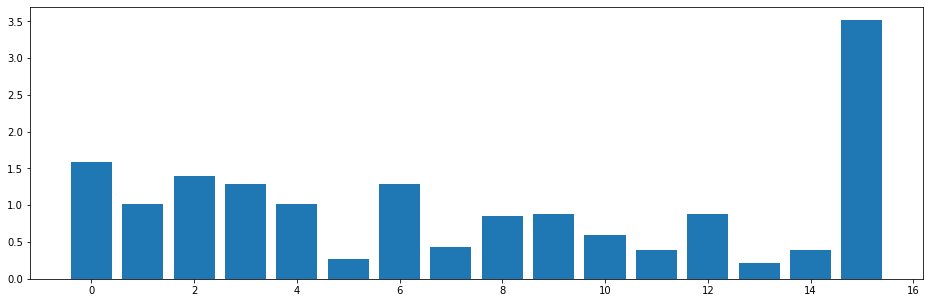

---------------
correct rate:  100.0 %


In [14]:
GT = G.T

n = G.shape[0]
u=0

for k in range(2**n):
    print("$$$$$$$$$$$$$$$$$$$")
    message = basis(n)[k]
    y = row_binary(message.dot(G))
    print("y = ",y)
    C = sum((1-2*y[a])*Cjk_generator(GT[a]) for a in range(GT.shape[0]))
    B = B_generator(GT.shape[1])
    s = init_s(n)
    s_d = (s).T
    print("the number of basis",k+1)

    #run the program
    start_time = time.time()
    step_size   = 0.05
    result_array = np.zeros(shape=(int(3.14/step_size)+1, int(3.14/step_size)+1))
    a_gamma         = np.arange(0, np.pi, step_size)
    a_beta          = np.arange(0, np.pi, step_size)
    print("Numbers of iteration: ",(pow((int(3.14/step_size)+1),2)))
    f_p_max = 0
    f_p_max_gamma = 0
    f_p_max_beta = 0
    f_psum = 0

    for i in range(0, int(3.14/step_size)+1):           # i for a_gamma
        for j in range(0, int(3.14/step_size)+1):       # j for a_beta

            #Construct U_C
            U_C = np.asmatrix(expm(-1j*2*a_gamma[i]*C))
            #Construct U_B
            U_B = expm(-1j*a_beta[j]*B)


            #Construct expection of each subgraph
            state = (U_B.dot(U_C)).dot(s).reshape(pow(2,n),1) # ket
            state_d = (state.conjugate()).T # bra


            f_p = (state_d.dot(C)).dot(state)
            f_psum += f_p


            if f_p.real > f_p_max:
                f_p_max = f_p.real
                f_p_max_gamma = a_gamma[i]
                f_p_max_beta = a_beta[j]

            result_array[i][j] = f_p.real
    print("\n Average expectation using QAOA with fine grid : ",(f_psum/pow(len(a_gamma),2)).real)       
    print("\n Maximum expectation using QAOA with fine grid : ",f_p_max)
    print("\n Optimal gamma : ",f_p_max_gamma)
    print("\n Optimal beta : ",f_p_max_beta)


    end_time = time.time()
    print("\n Runningtime : ",end_time - start_time)
    c = converter(message)
    r = np.ones(2**len(message))
    print(r)
    #Construct U_C
    U_C = np.asmatrix(expm(-1j*2*f_p_max_gamma*C))
    #Construct U_B
    U_B = expm(-1j*f_p_max_beta*B)


    #Construct expection of each subgraph
    state = (U_B.dot(U_C)).dot(r).reshape(pow(2,n),1) # ket
#     print(state)
    prob=[]
    for i in range(len(state)):
        p = (state[i].real)**2 + (state[i].imag)**2
        np.array(prob.append(float(p)))     
#     e = np.max(prob)
    print("most likey basis:  ",int(np.where(prob==np.max(prob))[0])+1)
    if int(k+1) != int(np.where(prob==np.max(prob))[0]+1):
        print("CANNOT correct！！！！！！")
    else:
        print("Good Job!!!!!!")
        u+=1
    plt.rcParams['figure.figsize'] = [16, 5]
    plt.bar(range(0, len(state)),prob)
    plt.show()
print("---------------")
print('correct rate: ',u/16*100,'%')

# One bit error decode

$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 0. 0. 0.]
y =  [1. 0. 0. 0. 0. 0. 0.]
the number of basis 1
most likey basis:   1
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 0. 0. 0.]
y =  [0. 1. 0. 1. 1. 0. 0.]
the number of basis 2
most likey basis:   2
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 0. 0. 0.]
y =  [1. 1. 1. 1. 0. 0. 1.]
the number of basis 3
most likey basis:   3
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 0. 0. 0.]
y =  [0. 0. 1. 0. 1. 0. 1.]
the number of basis 4
most likey basis:   4
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 0. 0. 0.]
y =  [1. 1. 1. 0. 1. 1. 0.]
the number of basis 5
most likey basis:   5
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 0. 0. 0.]
y =  [0. 0. 1. 1. 0. 1. 0.]
the number of basis 6
most likey basis:   6
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 0. 0. 0.]
y =  [1. 0. 0. 1. 1. 1. 1.]
the number of basis 7
most likey basis:   7
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 0. 0. 0.]
y =  [0

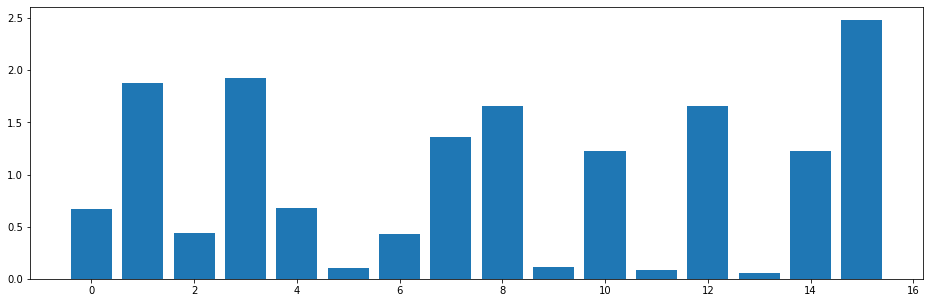

---------------
correct rate:  100.0 %
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 0.]
y =  [0. 1. 0. 0. 0. 0. 0.]
the number of basis 1
most likey basis:   1
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 0.]
y =  [1. 0. 0. 1. 1. 0. 0.]
the number of basis 2
most likey basis:   2
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 0.]
y =  [0. 0. 1. 1. 0. 0. 1.]
the number of basis 3
most likey basis:   3
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 0.]
y =  [1. 1. 1. 0. 1. 0. 1.]
the number of basis 4
most likey basis:   4
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 0.]
y =  [0. 0. 1. 0. 1. 1. 0.]
the number of basis 5
most likey basis:   5
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 0.]
y =  [1. 1. 1. 1. 0. 1. 0.]
the number of basis 6
most likey basis:   6
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 0.]
y =  [0. 1. 0. 1. 1. 1. 1.]
the number of basis 7
most likey basis:   7
Good Job!!!!!!
$$$$$$$$$$$$$$$$

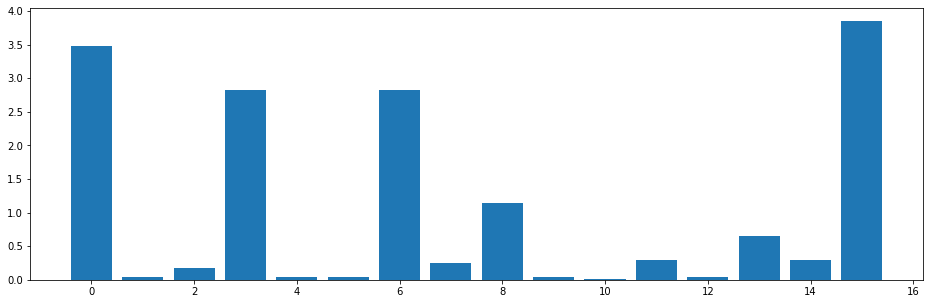

---------------
correct rate:  100.0 %
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 0.]
y =  [0. 0. 1. 0. 0. 0. 0.]
the number of basis 1
most likey basis:   1
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 0.]
y =  [1. 1. 1. 1. 1. 0. 0.]
the number of basis 2
most likey basis:   2
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 0.]
y =  [0. 1. 0. 1. 0. 0. 1.]
the number of basis 3
most likey basis:   3
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 0.]
y =  [1. 0. 0. 0. 1. 0. 1.]
the number of basis 4
most likey basis:   4
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 0.]
y =  [0. 1. 0. 0. 1. 1. 0.]
the number of basis 5
most likey basis:   5
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 0.]
y =  [1. 0. 0. 1. 0. 1. 0.]
the number of basis 6
most likey basis:   6
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 0.]
y =  [0. 0. 1. 1. 1. 1. 1.]
the number of basis 7
most likey basis:   7
Good Job!!!!!!
$$$$$$$$$$$$$$$$

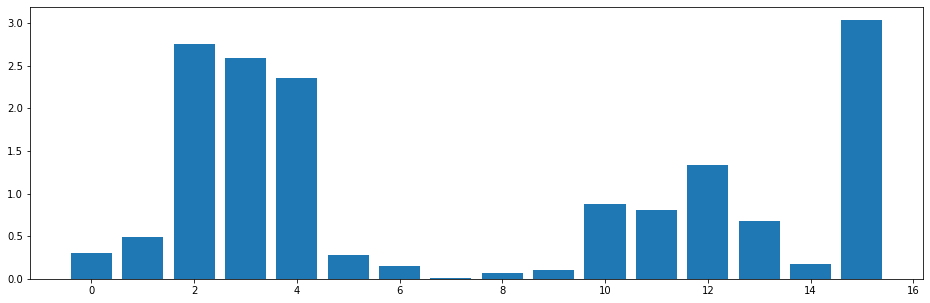

---------------
correct rate:  100.0 %
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 1. 0. 0. 0.]
y =  [0. 0. 0. 1. 0. 0. 0.]
the number of basis 1
most likey basis:   1
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 1. 0. 0. 0.]
y =  [1. 1. 0. 0. 1. 0. 0.]
the number of basis 2
most likey basis:   2
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 1. 0. 0. 0.]
y =  [0. 1. 1. 0. 0. 0. 1.]
the number of basis 3
most likey basis:   3
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 1. 0. 0. 0.]
y =  [1. 0. 1. 1. 1. 0. 1.]
the number of basis 4
most likey basis:   4
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 1. 0. 0. 0.]
y =  [0. 1. 1. 1. 1. 1. 0.]
the number of basis 5
most likey basis:   5
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 1. 0. 0. 0.]
y =  [1. 0. 1. 0. 0. 1. 0.]
the number of basis 6
most likey basis:   6
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 1. 0. 0. 0.]
y =  [0. 0. 0. 0. 1. 1. 1.]
the number of basis 7
most likey basis:   7
Good Job!!!!!!
$$$$$$$$$$$$$$$$

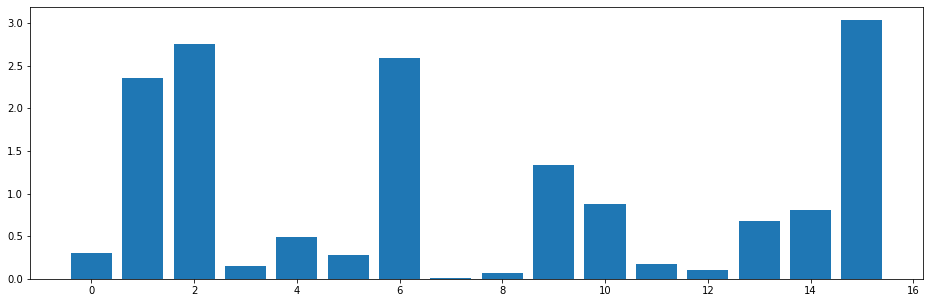

---------------
correct rate:  100.0 %
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 0. 0.]
y =  [0. 0. 0. 0. 1. 0. 0.]
the number of basis 1
most likey basis:   1
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 0. 0.]
y =  [1. 1. 0. 1. 0. 0. 0.]
the number of basis 2
most likey basis:   2
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 0. 0.]
y =  [0. 1. 1. 1. 1. 0. 1.]
the number of basis 3
most likey basis:   3
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 0. 0.]
y =  [1. 0. 1. 0. 0. 0. 1.]
the number of basis 4
most likey basis:   4
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 0. 0.]
y =  [0. 1. 1. 0. 0. 1. 0.]
the number of basis 5
most likey basis:   5
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 0. 0.]
y =  [1. 0. 1. 1. 1. 1. 0.]
the number of basis 6
most likey basis:   6
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 0. 0.]
y =  [0. 0. 0. 1. 0. 1. 1.]
the number of basis 7
most likey basis:   7
Good Job!!!!!!
$$$$$$$$$$$$$$$$

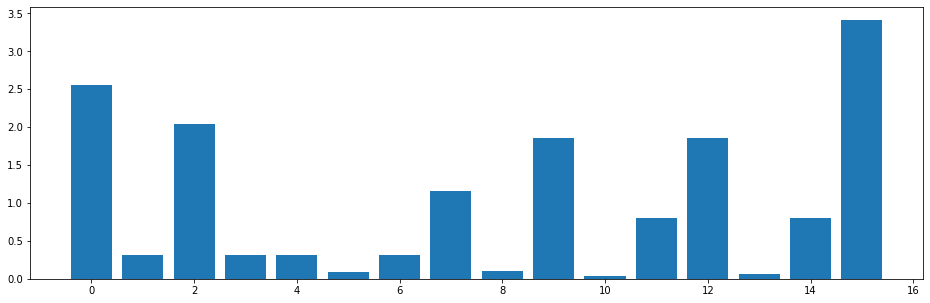

---------------
correct rate:  100.0 %
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 1. 0.]
y =  [0. 0. 0. 0. 0. 1. 0.]
the number of basis 1
most likey basis:   1
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 1. 0.]
y =  [1. 1. 0. 1. 1. 1. 0.]
the number of basis 2
most likey basis:   2
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 1. 0.]
y =  [0. 1. 1. 1. 0. 1. 1.]
the number of basis 3
most likey basis:   3
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 1. 0.]
y =  [1. 0. 1. 0. 1. 1. 1.]
the number of basis 4
most likey basis:   4
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 1. 0.]
y =  [0. 1. 1. 0. 1. 0. 0.]
the number of basis 5
most likey basis:   5
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 1. 0.]
y =  [1. 0. 1. 1. 0. 0. 0.]
the number of basis 6
most likey basis:   6
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 1. 0.]
y =  [0. 0. 0. 1. 1. 0. 1.]
the number of basis 7
most likey basis:   7
Good Job!!!!!!
$$$$$$$$$$$$$$$$

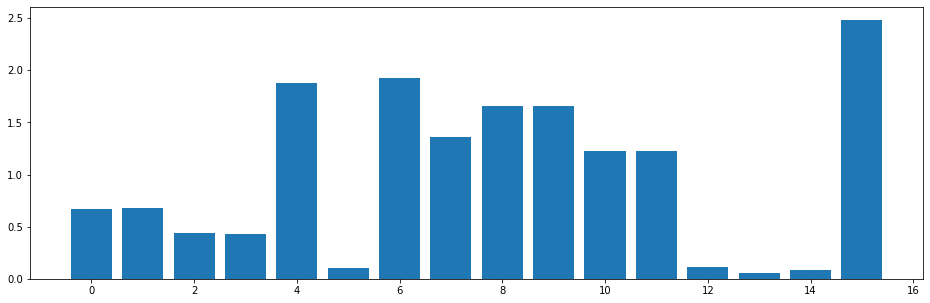

---------------
correct rate:  100.0 %
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 0. 1.]
y =  [0. 0. 0. 0. 0. 0. 1.]
the number of basis 1
most likey basis:   1
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 0. 1.]
y =  [1. 1. 0. 1. 1. 0. 1.]
the number of basis 2
most likey basis:   2
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 0. 1.]
y =  [0. 1. 1. 1. 0. 0. 0.]
the number of basis 3
most likey basis:   3
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 0. 1.]
y =  [1. 0. 1. 0. 1. 0. 0.]
the number of basis 4
most likey basis:   4
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 0. 1.]
y =  [0. 1. 1. 0. 1. 1. 1.]
the number of basis 5
most likey basis:   5
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 0. 1.]
y =  [1. 0. 1. 1. 0. 1. 1.]
the number of basis 6
most likey basis:   6
Good Job!!!!!!
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 0. 0. 1.]
y =  [0. 0. 0. 1. 1. 1. 0.]
the number of basis 7
most likey basis:   7
Good Job!!!!!!
$$$$$$$$$$$$$$$$

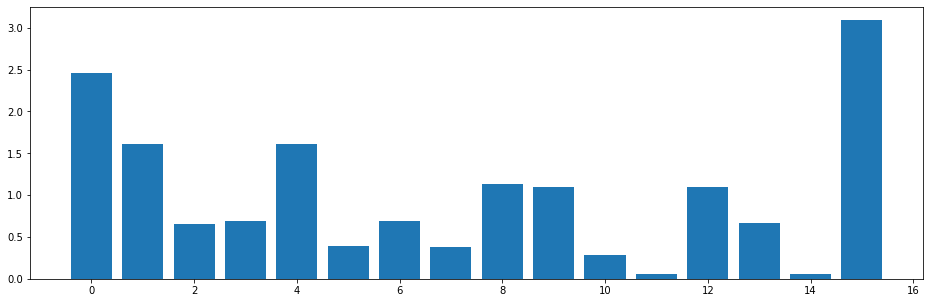

---------------
correct rate:  100.0 %
----------------------
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


In [15]:
GT = G.T

n = G.shape[0]
cor_rate=[]
for m in range(len(w1)):
    u=0
    for k in range(2**n):
        print("$$$$$$$$$$$$$$$$$$$")
        message = basis(n)[k]
        w = w1[m] 
        print("w = ",w)
        y = row_binary(message.dot(G)+w)
        print("y = ",y)
        C = sum((1-2*y[a])*Cjk_generator(GT[a]) for a in range(GT.shape[0]))
        B = B_generator(GT.shape[1])
        s = init_s(n)
        s_d = (s).T
        print("the number of basis",k+1)

        #run the program
        start_time = time.time()
        step_size   = 0.05
        result_array = np.zeros(shape=(int(3.14/step_size)+1, int(3.14/step_size)+1))
        a_gamma         = np.arange(0, np.pi, step_size)
        a_beta          = np.arange(0, np.pi, step_size)
        #print("Numbers of iteration: ",(pow((int(3.14/step_size)+1),2)))
        f_p_max = 0
        f_p_max_gamma = 0
        f_p_max_beta = 0
        f_psum = 0

        for i in range(0, int(3.14/step_size)+1):           # i for a_gamma
            for j in range(0, int(3.14/step_size)+1):       # j for a_beta

                #Construct U_C
                U_C = np.asmatrix(expm(-1j*2*a_gamma[i]*C))
                #Construct U_B
                U_B = expm(-1j*a_beta[j]*B)


                #Construct expection of each subgraph
                state = (U_B.dot(U_C)).dot(s).reshape(pow(2,n),1) # ket
                state_d = (state.conjugate()).T # bra


                f_p = (state_d.dot(C)).dot(state)
                f_psum += f_p


                if f_p.real > f_p_max:
                    f_p_max = f_p.real
                    f_p_max_gamma = a_gamma[i]
                    f_p_max_beta = a_beta[j]

                result_array[i][j] = f_p.real
#         print("\n Average expectation using QAOA with fine grid : ",(f_psum/pow(len(a_gamma),2)).real)       
#         print("\n Maximum expectation using QAOA with fine grid : ",f_p_max)
#         print("\n Optimal gamma : ",f_p_max_gamma)
#         print("\n Optimal beta : ",f_p_max_beta)


        end_time = time.time()
        #print("\n Runningtime : ",end_time - start_time)
        c = converter(message)
        r = np.ones(2**len(message))

        #Construct U_C
        U_C = np.asmatrix(expm(-1j*2*f_p_max_gamma*C))
        #Construct U_B
        U_B = expm(-1j*f_p_max_beta*B)


        #Construct expection of each subgraph
        state = (U_B.dot(U_C)).dot(r).reshape(pow(2,n),1) # ket
        prob=[]
        for i in range(len(state)):
            p = (state[i].real)**2 + (state[i].imag)**2
            np.array(prob.append(float(p)))      
        e = np.max(prob)
        print("most likey basis:  ",int(np.where(prob==np.max(prob))[0])+1)
        if int(k+1) != int(np.where(prob==np.max(prob))[0]+1):
            print("CANNOT correct！！！！！！")
        else:
            print("Good Job!!!!!!")
            u+=1
    plt.rcParams['figure.figsize'] = [16, 5]
    plt.bar(range(0, len(state)),prob)
    plt.show()
    print("---------------")
    print('correct rate: ',u/16*100,'%')
    cor_rate.append(u/16*100)
print('----------------------')
print(cor_rate)






# Two bits error decode

In [66]:
GT = G.T

n = G.shape[0]
u=0
cor_rate=[]
for m in range(len(w2)):
    u=0
    for k in range(2**n):
        print("$$$$$$$$$$$$$$$$$$$")
        message = basis(n)[k]
        w = w2[m] 
        print("w = ",w)
        y = row_binary(message.dot(G)+w)
        print("y = ",y)
        C = sum((1-2*y[a])*Cjk_generator(GT[a]) for a in range(GT.shape[0]))
        B = B_generator(GT.shape[1])
        s = init_s(n)
        s_d = (s).T
        print("the number of basis",k+1)

        #run the program
        start_time = time.time()
        step_size   = 0.05
        result_array = np.zeros(shape=(int(3.14/step_size)+1, int(3.14/step_size)+1))
        a_gamma         = np.arange(0, np.pi, step_size)
        a_beta          = np.arange(0, np.pi, step_size)
        #print("Numbers of iteration: ",(pow((int(3.14/step_size)+1),2)))
        f_p_max = 0
        f_p_max_gamma = 0
        f_p_max_beta = 0
        f_psum = 0

        for i in range(0, int(3.14/step_size)+1):           # i for a_gamma
            for j in range(0, int(3.14/step_size)+1):       # j for a_beta

                #Construct U_C
                U_C = np.asmatrix(expm(-1j*2*a_gamma[i]*C))
                #Construct U_B
                U_B = expm(-1j*a_beta[j]*B)


                #Construct expection of each subgraph
                state = (U_B.dot(U_C)).dot(s).reshape(pow(2,n),1) # ket
                state_d = (state.conjugate()).T # bra


                f_p = (state_d.dot(C)).dot(state)
                f_psum += f_p


                if f_p.real > f_p_max:
                    f_p_max = f_p.real
                    f_p_max_gamma = a_gamma[i]
                    f_p_max_beta = a_beta[j]

                result_array[i][j] = f_p.real
#         print("\n Average expectation using QAOA with fine grid : ",(f_psum/pow(len(a_gamma),2)).real)       
#         print("\n Maximum expectation using QAOA with fine grid : ",f_p_max)
#         print("\n Optimal gamma : ",f_p_max_gamma)
#         print("\n Optimal beta : ",f_p_max_beta)


        end_time = time.time()
        #print("\n Runningtime : ",end_time - start_time)
        c = converter(message)
        r = np.ones(2**len(message))

        #Construct U_C
        U_C = np.asmatrix(expm(-1j*2*f_p_max_gamma*C))
        #Construct U_B
        U_B = expm(-1j*f_p_max_beta*B)


        #Construct expection of each subgraph
        state = (U_B.dot(U_C)).dot(r).reshape(pow(2,n),1) # ket
        prob=[]
        for i in range(len(state)):
            p = (state[i].real)**2 + (state[i].imag)**2
            np.array(prob.append(float(p)))      
        e = np.max(prob)
        print("most likey basis:  ",int(np.where(prob==np.max(prob))[0])+1)
        if int(k+1) != int(np.where(prob==np.max(prob))[0]+1):
            print("CANNOT correct！！！！！！")
        else:
            print("Good Job!!!!!!")
            u+=1

    print("---------------")
    print('correct rate: ',u/16*100,'%')
    cor_rate.append(u/16*100)
print('----------------------')
print(cor_rate)

$$$$$$$$$$$$$$$$$$$
w =  [1. 1. 0. 0. 0. 0. 0.]
y =  [1. 1. 0. 0. 0. 0. 0.]
the number of basis 1
most likey basis:   13
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 1. 0. 0. 0. 0. 0.]
y =  [0. 0. 0. 1. 1. 0. 0.]
the number of basis 2
most likey basis:   14
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 1. 0. 0. 0. 0. 0.]
y =  [1. 0. 1. 1. 0. 0. 1.]
the number of basis 3
most likey basis:   15
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 1. 0. 0. 0. 0. 0.]
y =  [0. 1. 1. 0. 1. 0. 1.]
the number of basis 4
most likey basis:   16
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 1. 0. 0. 0. 0. 0.]
y =  [1. 0. 1. 0. 1. 1. 0.]
the number of basis 5
most likey basis:   9
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 1. 0. 0. 0. 0. 0.]
y =  [0. 1. 1. 1. 0. 1. 0.]
the number of basis 6
most likey basis:   10
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 1. 0. 0. 0. 0. 0.]
y =  [1. 1. 0. 1. 1. 1. 1.]
the number of basis 7
most likey basis:   11
CANNOT correct！！！！！！
$$$$$$$

most likey basis:   2
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 1. 0. 0.]
y =  [0. 1. 1. 1. 0. 1. 1.]
the number of basis 11
most likey basis:   3
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 1. 0. 0.]
y =  [1. 0. 1. 0. 1. 1. 1.]
the number of basis 12
most likey basis:   4
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 1. 0. 0.]
y =  [0. 1. 1. 0. 1. 0. 0.]
the number of basis 13
most likey basis:   5
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 1. 0. 0.]
y =  [1. 0. 1. 1. 0. 0. 0.]
the number of basis 14
most likey basis:   6
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 1. 0. 0.]
y =  [0. 0. 0. 1. 1. 0. 1.]
the number of basis 15
most likey basis:   7
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 1. 0. 0.]
y =  [1. 1. 0. 0. 0. 0. 1.]
the number of basis 16
most likey basis:   8
CANNOT correct！！！！！！
---------------
correct rate:  0.0 %
$$$$$$$$$$$$$$$$$$$
w =  [1. 0. 0. 0. 0. 1. 0.]
y =  [1. 0. 0. 0. 0.

most likey basis:   12
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 1. 0. 0. 0.]
y =  [1. 1. 1. 1. 1. 0. 1.]
the number of basis 4
most likey basis:   11
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 1. 0. 0. 0.]
y =  [0. 0. 1. 1. 1. 1. 0.]
the number of basis 5
most likey basis:   14
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 1. 0. 0. 0.]
y =  [1. 1. 1. 0. 0. 1. 0.]
the number of basis 6
most likey basis:   13
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 1. 0. 0. 0.]
y =  [0. 1. 0. 0. 1. 1. 1.]
the number of basis 7
most likey basis:   16
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 1. 0. 0. 0.]
y =  [1. 0. 0. 1. 0. 1. 1.]
the number of basis 8
most likey basis:   15
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 1. 0. 0. 0.]
y =  [1. 1. 0. 1. 1. 1. 0.]
the number of basis 9
most likey basis:   2
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 1. 0. 0. 0.]
y =  [0. 0. 0. 0. 0. 1. 0.]
the number of basis 10
most l

most likey basis:   5
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 1.]
y =  [1. 0. 1. 0. 0. 0. 1.]
the number of basis 13
most likey basis:   4
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 1.]
y =  [0. 1. 1. 1. 1. 0. 1.]
the number of basis 14
most likey basis:   3
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 1.]
y =  [1. 1. 0. 1. 0. 0. 0.]
the number of basis 15
most likey basis:   2
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 1. 0. 0. 0. 0. 1.]
y =  [0. 0. 0. 0. 1. 0. 0.]
the number of basis 16
most likey basis:   1
CANNOT correct！！！！！！
---------------
correct rate:  0.0 %
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 1. 0. 0. 0.]
y =  [0. 0. 1. 1. 0. 0. 0.]
the number of basis 1
most likey basis:   14
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 1. 0. 0. 0.]
y =  [1. 1. 1. 0. 1. 0. 0.]
the number of basis 2
most likey basis:   13
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 1. 0. 0. 0.]
y =  [0. 1. 0. 0. 0.

most likey basis:   16
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 1.]
y =  [1. 0. 0. 1. 0. 1. 1.]
the number of basis 6
most likey basis:   15
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 1.]
y =  [0. 0. 1. 1. 1. 1. 0.]
the number of basis 7
most likey basis:   14
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 1.]
y =  [1. 1. 1. 0. 0. 1. 0.]
the number of basis 8
most likey basis:   13
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 1.]
y =  [1. 0. 1. 0. 1. 1. 1.]
the number of basis 9
most likey basis:   4
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 1.]
y =  [0. 1. 1. 1. 0. 1. 1.]
the number of basis 10
most likey basis:   3
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 1.]
y =  [1. 1. 0. 1. 1. 1. 0.]
the number of basis 11
most likey basis:   2
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 1. 0. 0. 0. 1.]
y =  [0. 0. 0. 0. 0. 1. 0.]
the number of basis 12
most l

most likey basis:   4
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 1. 0. 0. 1.]
y =  [1. 0. 0. 0. 0. 0. 0.]
the number of basis 15
most likey basis:   1
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 1. 0. 0. 1.]
y =  [0. 1. 0. 1. 1. 0. 0.]
the number of basis 16
most likey basis:   2
CANNOT correct！！！！！！
---------------
correct rate:  0.0 %
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 1. 0.]
y =  [0. 0. 0. 0. 1. 1. 0.]
the number of basis 1
most likey basis:   9
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 1. 0.]
y =  [1. 1. 0. 1. 0. 1. 0.]
the number of basis 2
most likey basis:   10
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 1. 0.]
y =  [0. 1. 1. 1. 1. 1. 1.]
the number of basis 3
most likey basis:   11
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 1. 0.]
y =  [1. 0. 1. 0. 0. 1. 1.]
the number of basis 4
most likey basis:   12
CANNOT correct！！！！！！
$$$$$$$$$$$$$$$$$$$
w =  [0. 0. 0. 0. 1. 1. 0.]
y =  [0. 1. 1. 0. 0. 